# Exercises

## Control Charting for Variables and Attributes

The following notebook contains recommended solutions to selected exercises from lecture notes 3 to 7, concerning methods for control charting for variable and attribute quality characteristics.

In [8]:
library(qcc)

Package 'qcc' version 2.7
Type 'citation("qcc")' for citing this R package in publications.


**From Lecture Note 3, Exercise 4** Below are the headspace measurements for jelly beans from one production line given below.

In [9]:
jellybeans <- data.frame(matrix(c(
7, 10, 8, 2, 8,
6, 9, 3, 4, 3,
6, 7, 2, 6, 4,
4, 8, 5, 7, 7,
10, 3, 5, 6, 4,
8, 11, 9, 6, 6,
5, 7, 5, 6, 7,
9, 5, 8, 7, 6,
6, 5, 4, 5, 5,
1, 3, 1, 0, 3,
3, 4, 6, 5, 4,
5, 3, 6, 3, 3,
5, 6, 8, 9, 7,
7, 7, 8, 7, 6,
7, 7, 6, 7, 7,
7, 7, 7, 9, 9), byrow = TRUE, ncol = 5))

jellybeans

X1,X2,X3,X4,X5
7,10,8,2,8
6,9,3,4,3
6,7,2,6,4
4,8,5,7,7
10,3,5,6,4
8,11,9,6,6
5,7,5,6,7
9,5,8,7,6
6,5,4,5,5
1,3,1,0,3


(a) Given A2 = 0:577, D4 = 2:114, and D3 = 0, solve for the control limits of the  x and R
chart.

In [10]:
means <- apply(jellybeans, 1, mean)
r <- apply(jellybeans, 1, function(x) max(x) - min(x))

xchart.limits <- c(
    mean(means) - 0.577 * mean(r),
    mean(means) + 0.577 * mean(r)
)
           
xchart.limits

[1] 3.637688 8.037313

In [11]:
rchart.limits <- c(
    0 * mean(r),
    2.114 * mean(r)
)

rchart.limits

[1] 0.000000 8.059625

(b) Use the qcc package in R to construct the control chart. Check that the control limits
coincide with those used by the software.

List of 11
 $ call      : language qcc(data = jellybeans, type = "xbar")
 $ type      : chr "xbar"
 $ data.name : chr "jellybeans"
 $ data      : num [1:16, 1:5] 7 6 6 4 10 8 5 9 6 1 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics: Named num [1:16] 7 5 5 6.2 5.6 8 6 7 5 1.6 ...
  ..- attr(*, "names")= chr [1:16] "1" "2" "3" "4" ...
 $ sizes     : int [1:16] 5 5 5 5 5 5 5 5 5 5 ...
 $ center    : num 5.84
 $ std.dev   : num 1.64
 $ nsigmas   : num 3
 $ limits    : num [1, 1:2] 3.64 8.04
  ..- attr(*, "dimnames")=List of 2
 $ violations:List of 2
 - attr(*, "class")= chr "qcc"

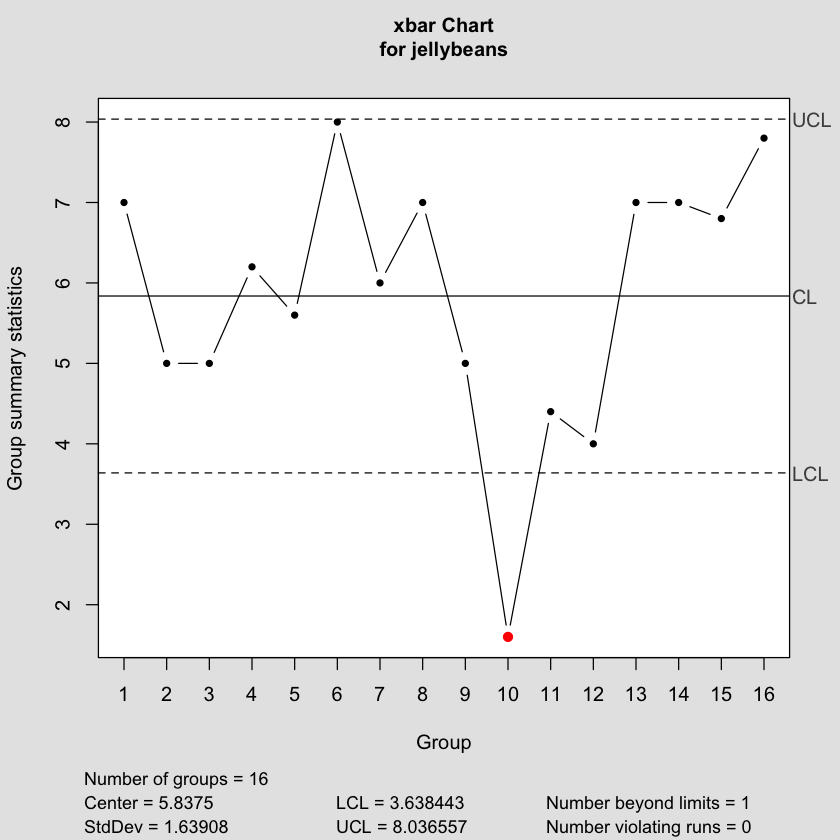

List of 11
 $ call      : language qcc(data = jellybeans, type = "R")
 $ type      : chr "R"
 $ data.name : chr "jellybeans"
 $ data      : num [1:16, 1:5] 7 6 6 4 10 8 5 9 6 1 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics: Named num [1:16] 8 6 5 4 7 5 2 4 2 3 ...
  ..- attr(*, "names")= chr [1:16] "1" "2" "3" "4" ...
 $ sizes     : int [1:16] 5 5 5 5 5 5 5 5 5 5 ...
 $ center    : num 3.81
 $ std.dev   : num 1.64
 $ nsigmas   : num 3
 $ limits    : num [1, 1:2] 0 8.06
  ..- attr(*, "dimnames")=List of 2
 $ violations:List of 2
 - attr(*, "class")= chr "qcc"

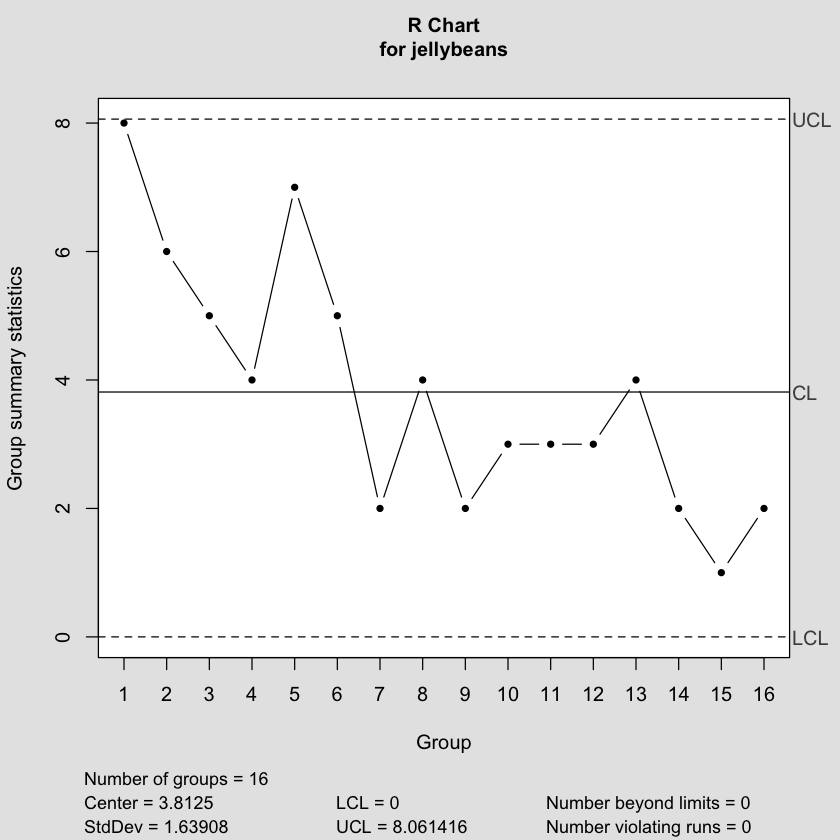

In [12]:
qcc(jellybeans, type = "xbar")
qcc(jellybeans, type = "R")

<br/>

**From Lecture Note 4, Exercise 1** Below are the headspace measurements for jelly beans from one production line given below.

$\sum_{i = 1}^{25}{\bar{x}_i} = 55.45$ $\sum_{i = 1}^{25}{s_i} = 28.67$

(a) Set up the control chart for this process

In [13]:
sbar <- 28.67/25
xbarbar <- 55.45/25

xbar.limits <- c(
    xbarbar - 1.954 * sbar,
    xbarbar + 1.954 * sbar
)

xbar.limits

[1] -0.0228472  4.4588472

In [14]:
s.limits <- c(
    0 * sbar,
    2.568 * sbar
)

s.limits

[1] 0.000000 2.944982

(b) Assuming that the process is in statistical control, estimate the process mean and standard deviation.

In [15]:
c(
    xbarbar,
    sbar / 0.8862
)

[1] 2.218000 1.294065

(c) Supposing that the process is supposed to have a mean 2.25 units with specification limits of only $\pm 4$ units. Evaluate the process capability based on the given data.

Note the $C_p$ ratio, $C_p = \frac{UCL - LCL}{6 \sigma}$

In [16]:
8 / (6 * sbar / 0.8862)

[1] 1.030345

<br/>

**From Lecture Note 5, Exercise 2** One-pound coffee cans are filled by a machine, sealed, and then weighed automatically. After adjusting for the weight of the can, any package that weighs less than 16 oz is cut out of the conveyor. The weights of 25 successive cans are shown in the table below.

In [17]:
coffee <- data.frame(W = c(
    16.11,16.08,16.12,16.10,16.10,
    16.11,16.12,16.09,16.12,16.10,
    16.09,16.07,16.13,16.12,16.10,
    16.08,16.13,16.15,16.12,16.10,
    16.08,16.07,16.11,16.13,16.10
))

(a) Set up a moving range control chart and a control chart for individuals. Estimate the mean and standard deviation of the amount of coffee packed in each can.

In [27]:
coffee.ranges <- cbind(
    coffee[1:(nrow(coffee) - 1),1],
    coffee[2:nrow(coffee),1]
)

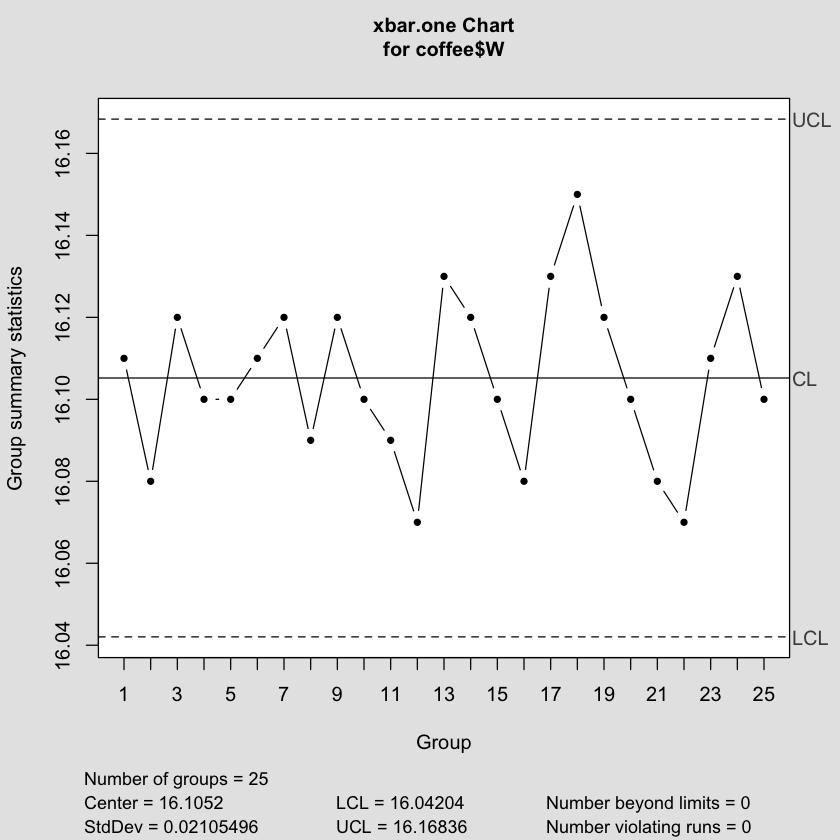

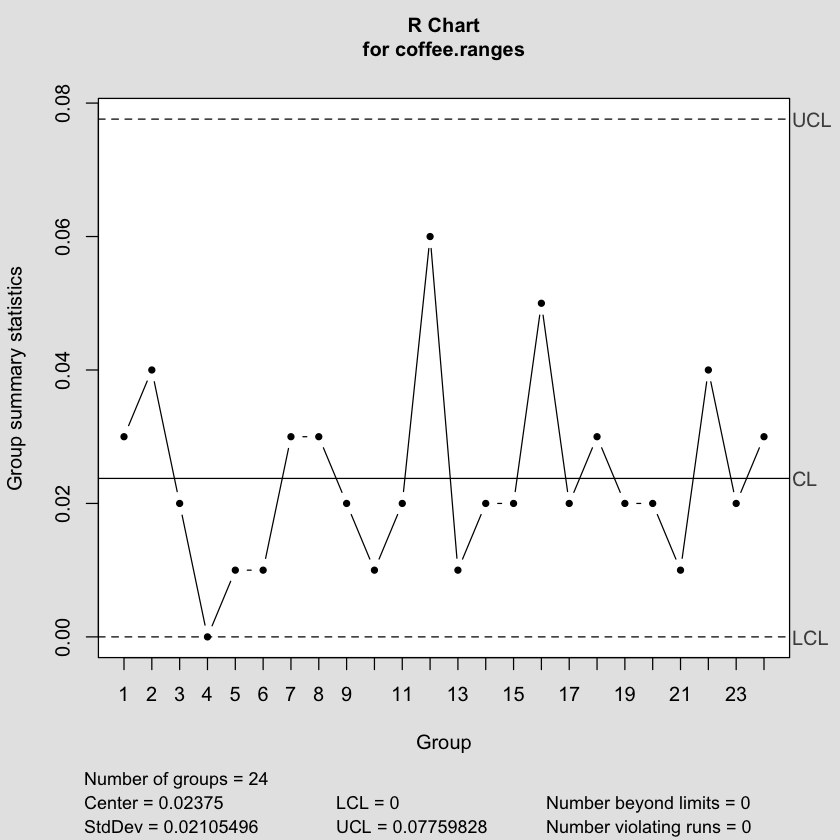

In [29]:
coffee.x1 <- qcc(coffee$W, type = "xbar.one")
coffee.mr <- qcc(coffee.ranges, type = "R")

<br/>

**From Lecture Note 7, Exercise 1** The data in the following table represent the number of nonconformities per 1,000 meters in telephone cable. From analysis of these data, would you conclude that the process is in statistical control? What control procedure would you recommend for future production?

In [20]:
cables <- data.frame(
    ncon = c(1,1,3,7,8,10,5,13,0,19,24,
             6,9,11,15,8,3,6,7,4,9,20)
)

head(cables)

ncon
1
1
3
7
8
10


In [21]:
cchart.limits <- c(
    mean(cables$ncon) - 3 * sqrt(mean(cables$ncon)),
    mean(cables$ncon) + 3 * sqrt(mean(cables$ncon))
)

cchart.limits

[1] -0.2021667 17.3839849

List of 11
 $ call      : language qcc(data = cables$ncon, type = "c")
 $ type      : chr "c"
 $ data.name : chr "cables$ncon"
 $ data      : num [1:22, 1] 1 1 3 7 8 10 5 13 0 19 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics: Named num [1:22] 1 1 3 7 8 10 5 13 0 19 ...
  ..- attr(*, "names")= chr [1:22] "1" "2" "3" "4" ...
 $ sizes     : int [1:22] 1 1 1 1 1 1 1 1 1 1 ...
 $ center    : num 8.59
 $ std.dev   : num 2.93
 $ nsigmas   : num 3
 $ limits    : num [1, 1:2] 0 17.4
  ..- attr(*, "dimnames")=List of 2
 $ violations:List of 2
 - attr(*, "class")= chr "qcc"

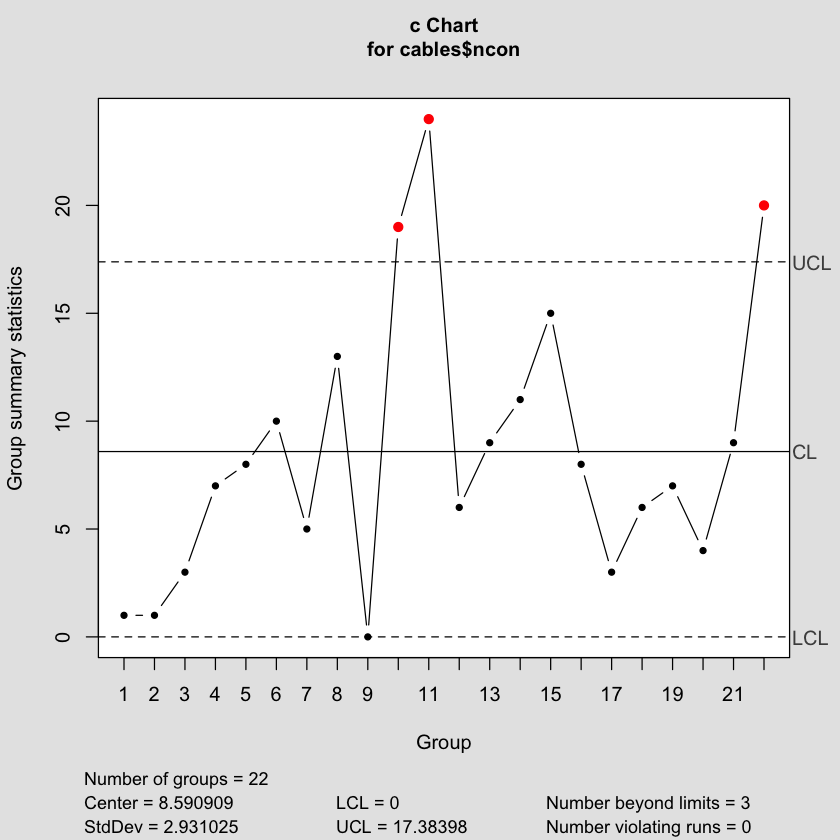

In [22]:
qcc(cables$ncon, type = "c")

<br/>

**From Lecture Note 7, Exercise 2** Suppose a new inspection unit is defined as 2,500 m of wire.

(a) What are the center line and control limits for a control chart for monitoring future
production based on the total number of nonconformities in the new inspection unit?

In [23]:
# from 1000 to 2500 m of wire, the new sampling unit is 2.5 times the old sampling unit
cchart.limits2 <- c(
    2.5 * mean(cables$ncon) - 3 * sqrt(2.5 * mean(cables$ncon)),
    2.5 * mean(cables$ncon) + 3 * sqrt(2.5 * mean(cables$ncon))
)

cchart.limits2

[1]  7.574199 35.380346

(b) What are the center line and control limits for a control chart for average nonconformities
per unit used to monitor future production?

In [24]:
uchart.limits <- c(
    mean(cables$ncon) - 3 * sqrt(mean(cables$ncon)/1),
    mean(cables$ncon) + 3 * sqrt(mean(cables$ncon)/1)
)

uchart.limits

[1] -0.2021667 17.3839849

List of 11
 $ call      : language qcc(data = cables$ncon, type = "u", sizes = 1)
 $ type      : chr "u"
 $ data.name : chr "cables$ncon"
 $ data      : num [1:22, 1] 1 1 3 7 8 10 5 13 0 19 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics: Named num [1:22] 1 1 3 7 8 10 5 13 0 19 ...
  ..- attr(*, "names")= chr [1:22] "1" "2" "3" "4" ...
 $ sizes     : num [1:22] 1 1 1 1 1 1 1 1 1 1 ...
 $ center    : num 8.59
 $ std.dev   : num 2.93
 $ nsigmas   : num 3
 $ limits    : num [1, 1:2] 0 17.4
  ..- attr(*, "dimnames")=List of 2
 $ violations:List of 2
 - attr(*, "class")= chr "qcc"

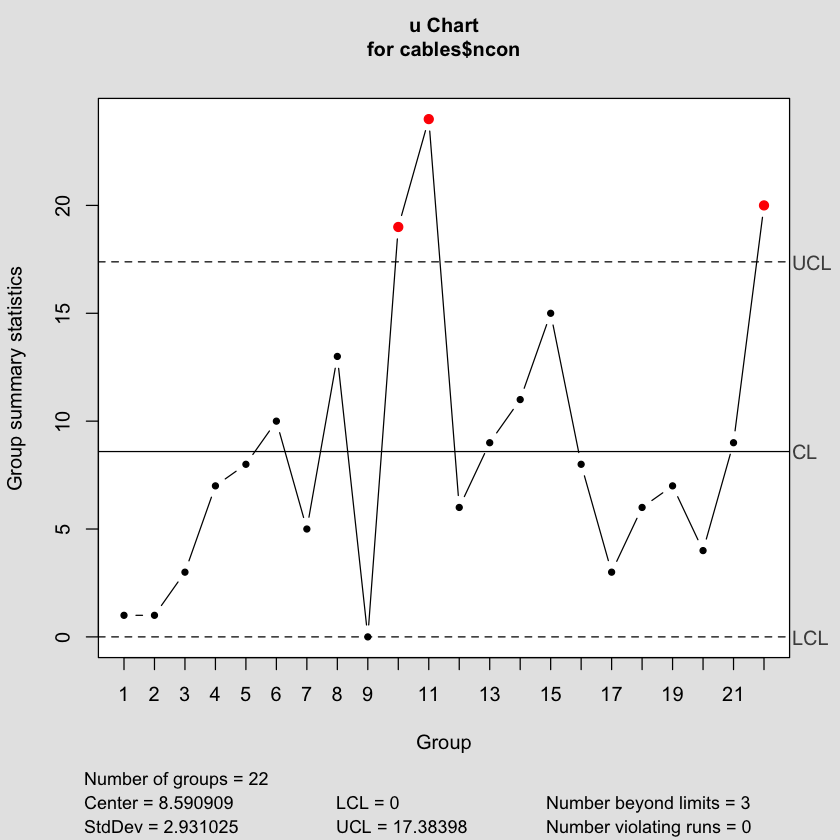

In [25]:
qcc(cables$ncon, sizes = 1, type = "u")

List of 15
 $ call        : language qcc(data = cables$ncon, type = "u", sizes = 1, newdata = newcable$ncon,      newsizes = newcable$size)
 $ type        : chr "u"
 $ data.name   : chr "cables$ncon"
 $ data        : num [1:22, 1] 1 1 3 7 8 10 5 13 0 19 ...
  ..- attr(*, "dimnames")=List of 2
 $ statistics  : Named num [1:22] 1 1 3 7 8 10 5 13 0 19 ...
  ..- attr(*, "names")= chr [1:22] "1" "2" "3" "4" ...
 $ sizes       : num [1:22] 1 1 1 1 1 1 1 1 1 1 ...
 $ center      : num 8.59
 $ std.dev     : num 2.93
 $ newstats    : Named num [1:3] 6 4 6
  ..- attr(*, "names")= chr [1:3] "23" "24" "25"
 $ newdata     : num [1:3, 1] 15 10 15
 $ newsizes    : num [1:3] 2.5 2.5 2.5
 $ newdata.name: chr "newcable$ncon"
 $ nsigmas     : num 3
 $ limits      : num [1:25, 1:2] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
 $ violations  :List of 2
 - attr(*, "class")= chr "qcc"

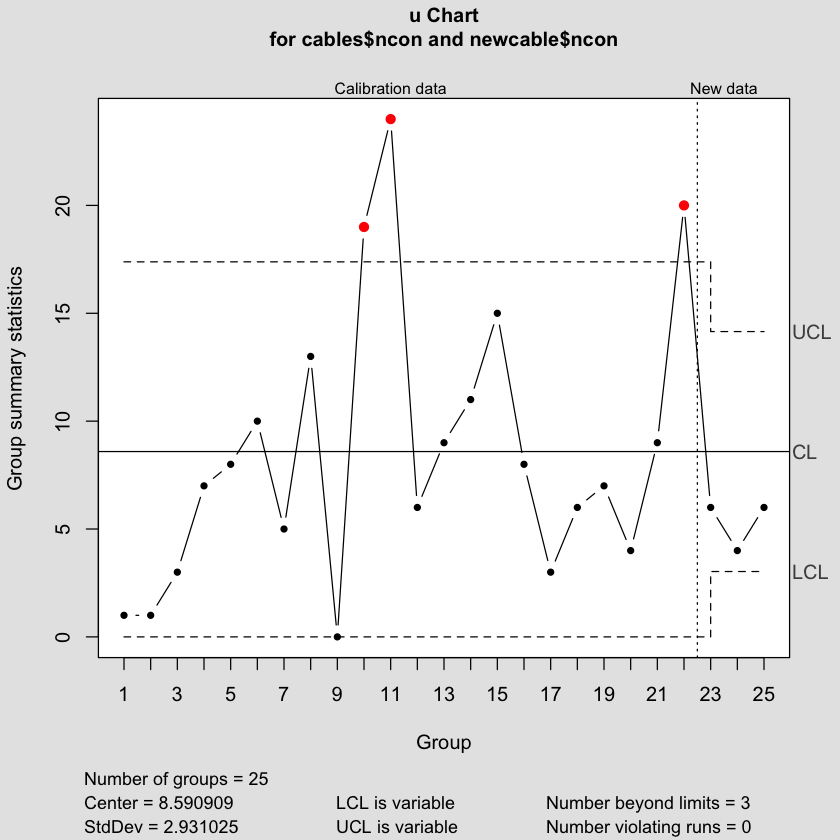

In [26]:
newcable <- data.frame(
    ncon = c(15,10,15),
    size = c(2.5,2.5,2.5)
)

qcc(cables$ncon, sizes = 1, type = "u", newdata = newcable$ncon, newsizes = newcable $size)